<h1> Task 1: Data Cleaning & Preprocessing

<h2> Objective: Learn how to clean and prepare raw data for ML.<br>
Tools: Python, Pandas, NumPy, Matplotlib/Seaborn</h2>

<h3>Task to be performed:</h3>
<ol>
<li>Import the dataset and explore basic info (nulls, data types).
<li>Handle missing values using mean/median/imputation.
<li>Convert categorical features into numerical using encoding.
<li>Normalize/standardize the numerical features.
<li>Visualize outliers using boxplots and remove them.
</ol>

<h3>Dataset:- Titanic Dataset downloaded from Kaggle </h3>

In [ ]:
#Importing the required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

<h5>T-1:- Import the dataset and explore basic info (nulls, data types).

In [ ]:
# Importing the dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape

(891, 12)

In [ ]:
# Finding missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<h5>T-2:- Handle missing values using mean/median/imputation.</h5>

In [ ]:
# Age is filled with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [ ]:
# Embarked is filled with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
# Drop 'Cabin' due to many missing values
df.drop(columns=['Cabin'], inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<h5>T-3:- Convert categorical features into numerical using encoding.</h5>

In [ ]:
# Encode categorical features
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])         # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C=0, Q=1, S=2

<h5>T-4:- Normalize/standardize the numerical features.</h5>

In [ ]:
# Normalize/standardize numerical features
scaler = StandardScaler()
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
df[num_cols] = scaler.fit_transform(df[num_cols])

<h5>T-5:- Visualize outliers using boxplots and remove them.</h5>

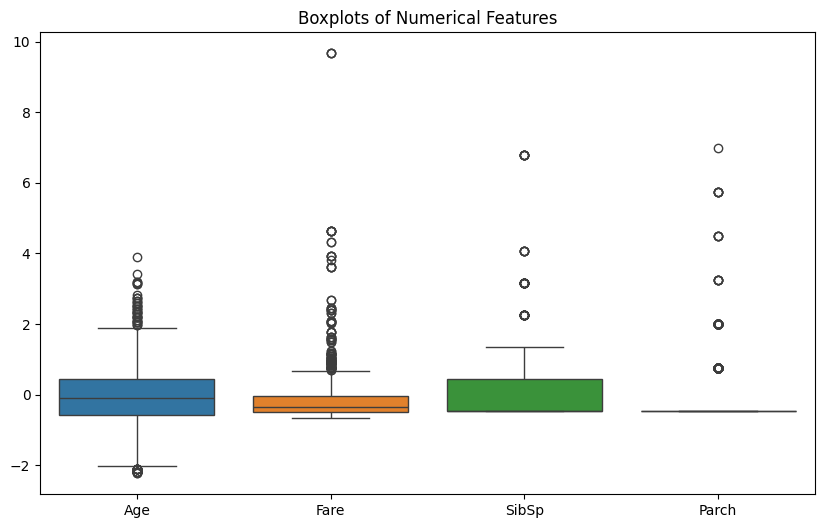

In [ ]:
# Visualize outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplots of Numerical Features')
plt.show()

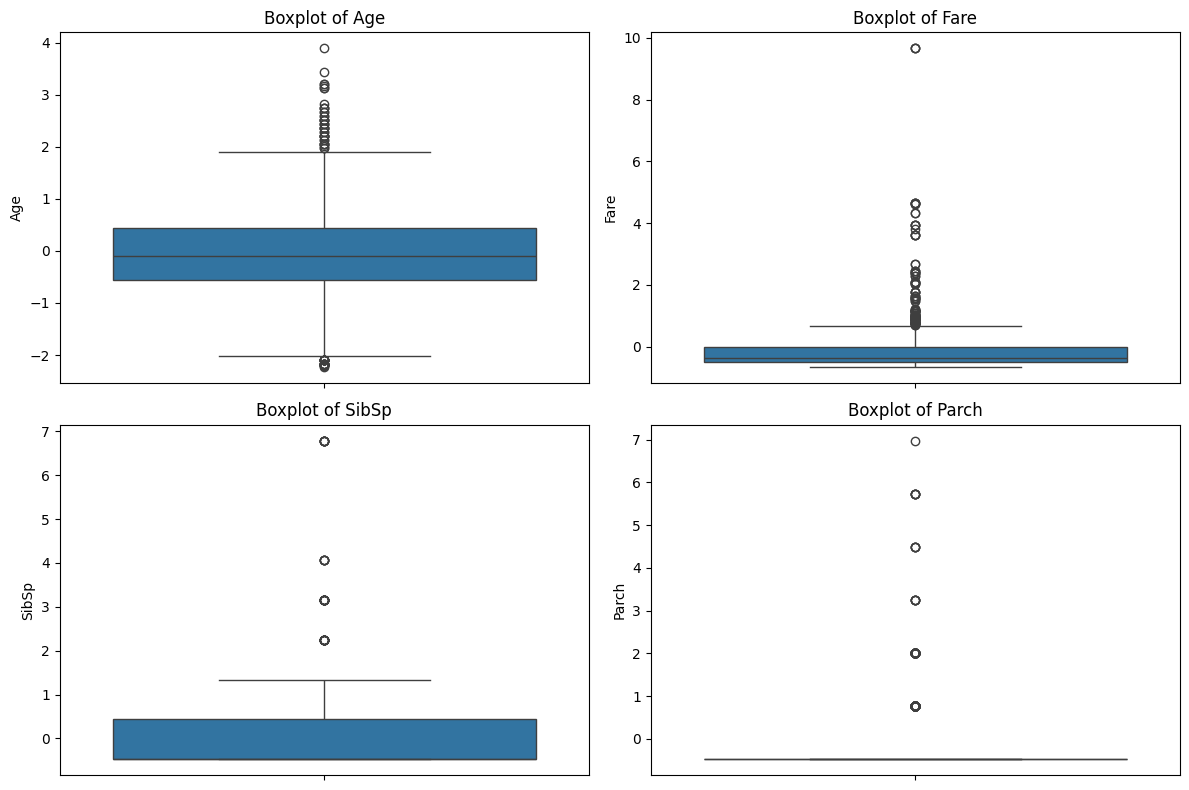

In [ ]:
# Visualize outliers using boxplots of every variable separately
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Remove outliers using IQR method
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [ ]:
df_cleaned = remove_outliers(df, num_cols)

<h1>Final Result Day 1</h1>

In [ ]:
print(f"\nData shape after removing outliers: {df_cleaned.shape}")


Data shape after removing outliers: (577, 11)


In [ ]:
df_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,2
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,0.432793,-0.473674,113803,0.420730,2
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,-0.474545,-0.473674,373450,-0.486337,2
5,6,0,3,"Moran, Mr. James",1,-0.104637,-0.474545,-0.473674,330877,-0.478116,1


<h1>Day 2</h1>

<h1>Task 2: Exploratory Data Analysis (EDA)</h1>

<h2>Objective: Understand data using statistics and visualizations.<br>
Tools: Pandas, Matplotlib, Seaborn, Plotly</h2>

<h3>Hints/Mini Guide:</h3>
<ol>
<li>Generate summary statistics (mean, median, std, etc.).
<li>Create histograms and boxplots for numeric features.
<li>Use pairplot/correlation matrix for feature relationships.
<li>Identify patterns, trends, or anomalies in the data.
<li>Make basic feature-level inferences from visuals.
</ol>

<h5>T-1:- Generate summary statistics (mean, median, std, etc.)</h5>

In [ ]:
# Summary Statistics
print("\nSummary Statistics:")
print(df_cleaned.describe(include='all'))


Summary Statistics:
        PassengerId    Survived      Pclass                 Name         Sex  \
count    577.000000  577.000000  577.000000                  577  577.000000   
unique          NaN         NaN         NaN                  577         NaN   
top             NaN         NaN         NaN  Dooley, Mr. Patrick         NaN   
freq            NaN         NaN         NaN                    1         NaN   
mean     450.590988    0.299827    2.502600                  NaN    0.752166   
std      259.568357    0.458579    0.733909                  NaN    0.432129   
min        1.000000    0.000000    1.000000                  NaN    0.000000   
25%      222.000000    0.000000    2.000000                  NaN    1.000000   
50%      455.000000    0.000000    3.000000                  NaN    1.000000   
75%      676.000000    1.000000    3.000000                  NaN    1.000000   
max      891.000000    1.000000    3.000000                  NaN    1.000000   

               Age

<h5>T-2:- Create histograms and boxplots for numeric features.</h5>


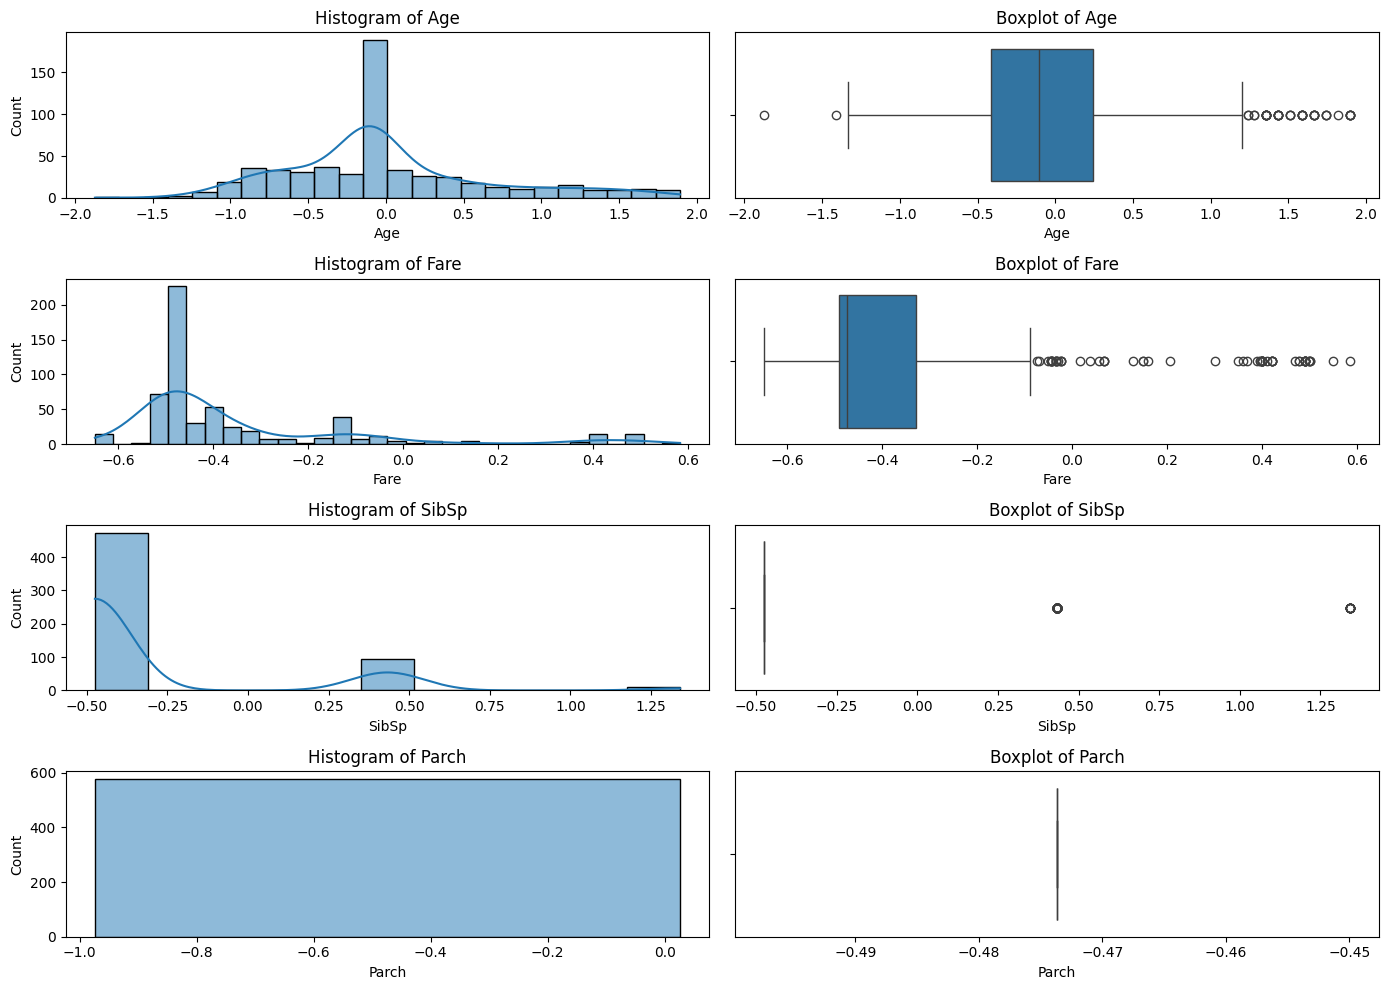

In [ ]:
# Creating Histogram and Boxplots
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, 2 * i - 1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(4, 2, 2 * i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

<h5>T-3:- Use pairplot/correlation matrix for feature relationships.</h5>

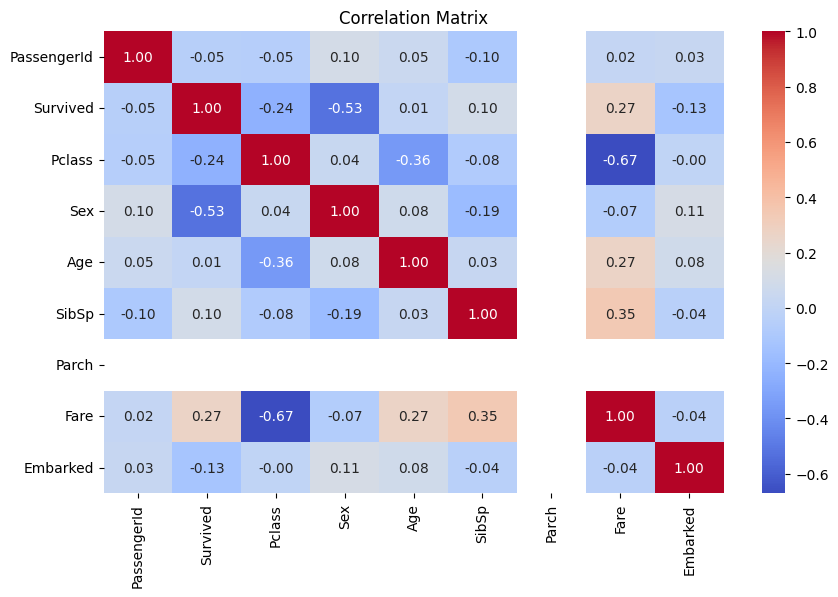

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation matrix
numeric_df = df_cleaned.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

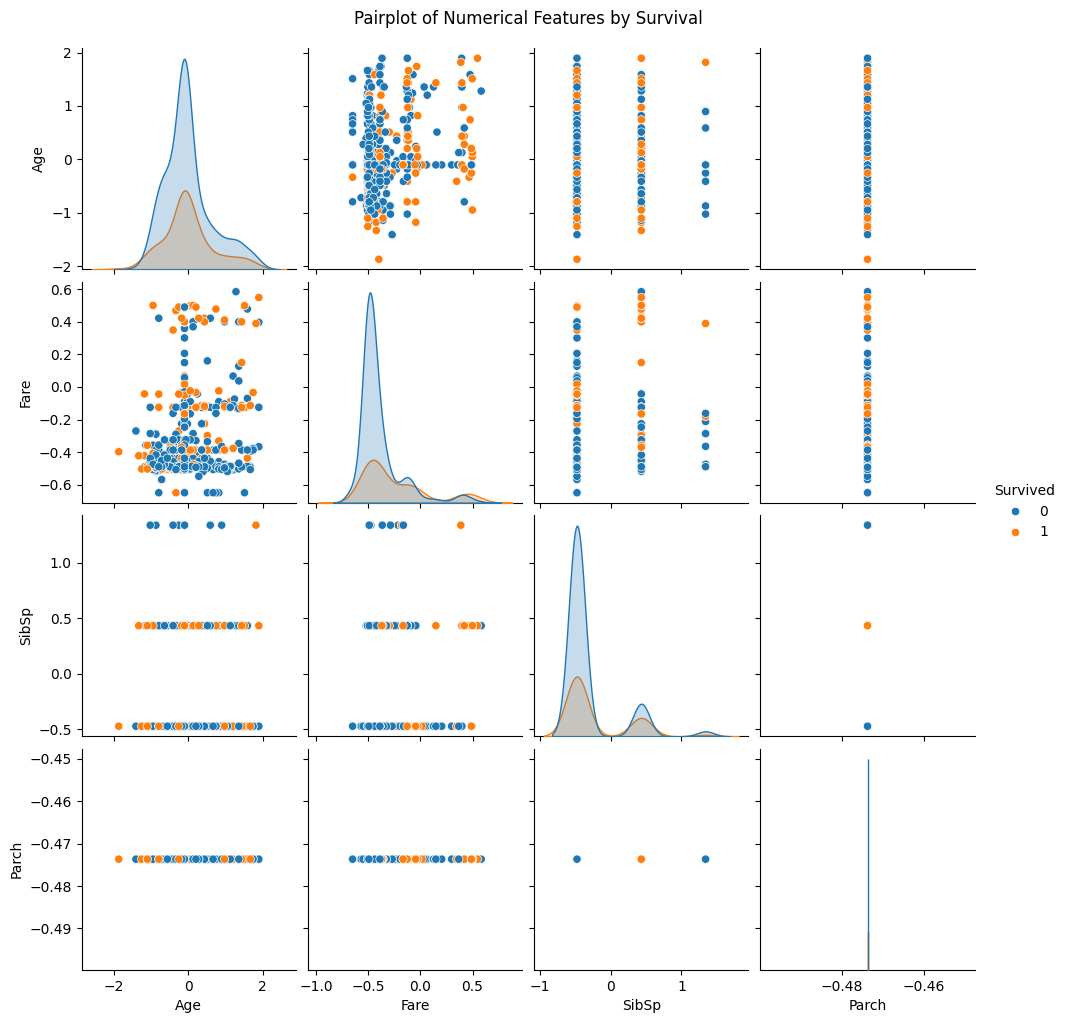

In [ ]:
# Pairplot
sns.pairplot(df_cleaned[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.suptitle("Pairplot of Numerical Features by Survival", y=1.02)
plt.show()

<h5>T-4:- Identify patterns, trends, or anomalies in the data.</h5>

<h4>Pattern, Trends and Anomalies</h4>
<ol>
<li>Trends:
<ul>
<li>Passengers who paid higher fares had a higher chance of survival.
<li>Children (younger age group) had a slightly better survival rate.
<li>Passengers embarked from Cherbourg (C) had a slightly higher survival rate, often linked with higher fare and first class.
</ul>
<li>Patterns:
<ul>
<li>Females had a significantly higher survival rate than males.
<li>Passengers with small family sizes (SibSp = 1–2 or Parch = 1) had better survival rates than solo travellers.
</ul>
<li>Anomalies
<ul>
<li>Some passengers in 3rd class paid exceptionally high fares (group tickets).
<li>A few elderly passengers survived despite lower odds.
<li>While most males didn’t survive, some exceptions occurred, likely due to status (crew, first class).
</ul>
</ol>

<h5>T-5:- Make basic feature-level inferences from visuals.</h5>

<h6>Inferences from Visuals</h6>
<ul>
<li>Passengers with higher fare tend to have higher survival rate.
<li>Younger passengers are slightly more likely to survive (mild correlation).
<li>'SibSp' and 'Parch' show clusters of family survival, especially small families.
<li>Fare and Pclass are correlated, indicating class-based ticket pricing.
<li>Outliers were present in 'Fare' and 'Age' before normalization.
</ul>